# self organizing map (SOM)
<img src="https://i.ibb.co/KhnX4nP/SOM.png" alt="SOM"  style="width: 800px;"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

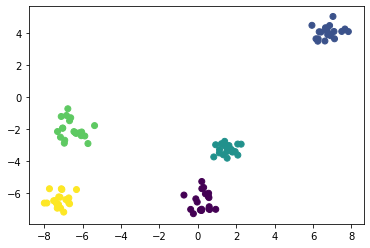

In [2]:
X , y = datasets.make_blobs(n_samples = 100, centers= 5 , n_features=2, cluster_std = 0.5 )
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [3]:
def calc_std(neighbors, closest_center):
    sigma = 0 
    N = len(neighbors)    
    sigma = np.sum(np.sum((neighbors - closest_center) ** 2 , axis = 1) ) /N
    sigma = np.sqrt(sigma)     
    return sigma


def nh_function(i, l, sigma):
    if l == i:
        return 1
    else:        
        exp_term = (-(l-i)**2)/(2*sigma**2)
        output = (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(exp_term)
        return output
    


# the number of clusters = k
# the number of neighbors at each side = n_size
# the discounting factor = step_size
def som_clustering(X, K, n_size , step_size = 0.05, n_iter = 100 ):
    d = X.shape[1]
    centers = np.zeros([K,d])
    N = len(X)
    
    # choose centers randomly from data points
    for i in range(K):
        index = np.random.randint(0, N)
        centers[i] = X[index]
        
    #np.random.shuffle(X)
    for _iter in range(n_iter):
        for t in range(N):
            
            # calculate distance of each data point to all centers using euclidean distance           
            distance_all_centers = np.sqrt(np.sum((centers - X[t])  ** 2, axis = 1))
            # get index of closet center to data point
            i = np.argmin(distance_all_centers)
            
            lower_range , upper_range = max(i - n_size, 0) , min(i + n_size + 1, K) 
            neighbors = centers[lower_range : upper_range]
            sigma = calc_std(neighbors, centers[i])

            #update all the neighbor centers at the same time
            for n_i in range(lower_range , upper_range):
                nh_func_res = nh_function(i, n_i, sigma) 
                centers[n_i] = centers[n_i] +  step_size *  nh_func_res *( X[t] - centers[n_i] ) 

    return centers
        

[[ 5.55461496  2.29828987]
 [ 3.28254013 -1.02674987]
 [ 1.06258586 -4.54522517]
 [-3.14576537 -3.98324036]
 [-6.70338668 -3.80853044]]


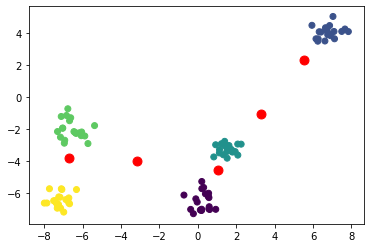

In [4]:
K = len(np.unique(y))
centers = som_clustering(X, K, 1, n_iter = 20) 
print(centers)

plt.scatter(X[:,0], X[:,1], c = y)
plt.scatter(centers[:,0], centers[:,1], c= 'red' , s=80)
plt.show()